## Project Name :- Space debris tracking and movement prediction to prevent collisions with active satellites

Today's man-made space-debris environment is a direct consequence of the relentless pace of space activities that have taken place since Sputnik's pioneering launch in 1957. 
Since that pivotal moment, the orbital landscape has become increasingly crowded, marked by more than 4000 rocket launches and a disturbing array of other debris-generating occurrences,
including over 150 in-orbit fragmentation events.


This unchecked proliferation has led to a critical situation: among the more than 8700 objects currently larger than 10 cm in Earth orbits, a staggering reality emerges – only about 6% are operational satellites, while the vast remainder is inert space debris. 
This problem is further exacerbated by the burgeoning number of new satellite mega-constellations and ever-increasing launch rates, projecting a future with an even more densely populated orbital environment.

The implications of this congestion are severe. Even small pieces of debris, traveling at orbital velocities of tens of thousands of kilometers per hour, possess immense kinetic energy. 
A collision could lead to catastrophic consequences: the destruction of invaluable operational satellites, disruption of vital services that humanity relies on daily (such as communication, navigation, and weather forecasting)
and the generation of even more debris, triggering a cascading chain reaction known as the Kessler Syndrome. This self-sustaining cycle of collisions could render certain orbital regions unusable for decades, posing an existential threat to future space exploration and utilization.

In light of this escalating risk, the development of robust and proactive solutions for space situational awareness is no longer a luxury, but an imperative. Effectively tracking this burgeoning population of orbital junk and accurately predicting potential collision events are paramount to safeguarding our active space assets and ensuring the long-term sustainability of space. 
It is against this critical backdrop that this project aims to contribute, developing a system focused on the precise tracking and prediction of space debris movement to prevent such catastrophic encounters with operational satellites.


This project, "Space debris tracking and movement prediction to prevent collisions with active satellites" is structured around three core phases to tackle this challenge:

Phase 1: Data Acquisition, Cleaning, and Transformation.

Phase 2: Orbital Tracking and Visualization.

Phase 3: Quantitative Conjunction Analysis and Collision Prediction.


#### Phase 1: Data Acquisition, Cleaning, and Transformation.


The foundational step of this project involves the meticulous acquisition, cleaning, and transformation of satellite and space debris orbital data. This phase is critical, as the accuracy and structure of the input data directly influence the reliability of subsequent orbital predictions and collision analyses.

1. Library Initialization:
The process begins by importing a suite of essential Python libraries:

pandas: Utilized for efficient data manipulation and tabular data structuring (DataFrames).
skyfield: The core astronomical library, indispensable for parsing Two-Line Elements (TLEs), calculating precise satellite positions, and managing celestial time.
os: For operating system interactions, particularly in managing file paths for data storage.
io: Specifically, StringIO is employed to handle string data as if it were a file, facilitating TLE parsing.
datetime: For robust handling of date and time objects, crucial for defining propagation windows.
numpy: Provides powerful numerical computing capabilities, especially for array operations central to positional calculations.
matplotlib.pyplot and mpl_toolkits.mplot3d: Essential for generating 2D and 3D visualizations of orbital trajectories.
PIL (Pillow) and urllib.request: Included for potential image processing tasks, such as loading textures for celestial bodies in 
visualizations (though this part is not directly shown in the TLE parsing).

2. Pandas Display Configuration:
To enhance the readability and comprehensive display of the tabular TLE data, Pandas' display options are precisely configured. This ensures that DataFrames, when printed, show all columns, maintain a wide layout, and present numerical values with a specified precision, which is vital for inspecting orbital parameters.

3. Data File Path Definition:
The project explicitly defines the file paths for the primary raw data sources: LAST_30_DAYS_LAUNCHES.txt (containing TLEs for recently launched objects) and ACTIVE_SATELLITES.txt (housing TLEs for a broader catalog of operational satellites). These paths serve as direct references for data ingestion.

4. Orbital Propagation Parameter Setup:
Before processing the TLEs, fundamental temporal parameters are established for orbital propagation:

TIME_DURATION_IN_HRS: Defines the total duration for which satellite movements will be modeled (e.g., 12 hours for visualization).
TIME_STEP_MINUTES: Sets the granularity of the time steps within this duration (e.g., 1 minute), impacting the density of calculated positions.
INITIAL_TIME_SCALE: Initializes Skyfield's highly accurate timekeeping system, which is essential for consistent astronomical calculations.
CURRENT_TIME: Captures the exact moment the analysis begins, setting the starting point for all orbital predictions.
FUTURE_TIME: Calculated by adding the TIME_DURATION_IN_HRS to the CURRENT_TIME, marking the end of the initial propagation window.

5. TLE Parsing Function (parse_tle_file_to_df_and_objects)
At the heart of this data transformation phase is the custom function parse_tle_file_to_df_and_objects(file_path, ts). This robust function is designed to be reusable and is invoked twice – once for each TLE data file – to perform two critical tasks: securely loading the TLE content and meticulously parsing it into a structured format.

Function Signature and Purpose: The function accepts file_path (the location of the TLE data) and ts (the initialized Skyfield timescale). Its primary role is to extract meaningful orbital information from the raw TLE text and convert it into a well-organized Pandas DataFrame, while simultaneously creating active Skyfield EarthSatellite objects for each entry.

Secure File Loading:
The function initializes an empty string tle_data_string to hold the raw file content. A try-except block is employed to ensure fault-tolerant file loading.

Within the try block, Python's built-in open() function is used with 'r' (read mode) to access the file_path. The entire content of the file is then read into tle_data_string.
The except FileNotFoundError clause gracefully handles cases where the specified file does not exist, providing a clear error message. A general except Exception captures any other unforeseen issues during file reading. This robust error handling prevents script termination due to common data access problems.
Detailed TLE Data Allocation and Object Creation:
Once the raw TLE data is loaded, the function proceeds to parse it line by line:

Two empty lists, satellites_data and satellite_objects, are initialized. satellites_data will collect dictionaries of extracted orbital parameters for DataFrame creation, while satellite_objects will store the instantiated EarthSatellite objects.
StringIO(tle_data_string).readlines() effectively treats the multi-line TLE string as an in-memory file, allowing it to be processed line by line, mimicking file reading.
Several control variables (current_name, line1, line2, line_number_in_file) are initialized to None or 0 to manage the parsing state within the loop.
A for loop iterates through each line from the StringIO object. The .strip() method is applied to remove leading/trailing whitespace.
The parsing logic leverages conditional checks:
Initially, the first line, typically containing the satellite's common name, does not match the startswith('1 ') or startswith('2 ') patterns. It is therefore assigned to current_name at the end of the loop iteration, establishing the context for the subsequent TLE lines.
In the second iteration, the startswith('1 ') condition is met, and the first TLE line is stored in line1.
In the third iteration, startswith('2 ') is met, and the second TLE line is stored in line2.
Once current_name, line1, and line2 are all populated for a given satellite, the core processing block if current_name and line1 and line2: is executed.
Inside this block, skyfield.api.EarthSatellite(line1, line2, current_name, ts) is invoked. This crucial step constructs an EarthSatellite object, which encapsulates the complex orbital mechanics derived from the TLE data. This object becomes the primary tool for propagating the satellite's position.
The newly created EarthSatellite object is appended to satellite_objects.
Key orbital parameters (e.g., Inclination_deg, RAAN_deg, Eccentricity, Mean_Motion_rev_per_day) and descriptive metadata (e.g., International_Designator, Classification_Type) are then extracted directly from the satellite.model attributes. These are carefully converted to standard units (e.g., radians to degrees) for clarity and appended as a dictionary to the satellites_data list.
A nested try-except block handles potential errors during the parsing of individual TLE lines, ensuring that malformed entries do not halt the entire process.
Finally, the control variables are reset to None to prepare for parsing the next TLE block.
Function Return Values: Upon completion of the parsing loop, the function returns two critical outputs:

A Pandas DataFrame (df = pd.DataFrame(satellites_data)), which presents the extracted and transformed TLE data in a clean, tabular, and easily analyzable format.
The satellite_objects list, containing all the generated EarthSatellite objects, which are directly usable by Skyfield for orbital propagation.

6. Loading Both Data Files:
After the parse_tle_file_to_df_and_objects function is defined, it is invoked twice:

Last_30_Days_Launches_Df, Last_30_Days_Launches_File = parse_tle_file_to_df_and_objects(LAST_30_DAYS_LAUNCHES, INITIAL_TIME_SCALE)
Active_Satellites_Df, Active_Satellites_File = parse_tle_file_to_df_and_objects(ACTIVE_SATELLITES, INITIAL_TIME_SCALE) This populates separate DataFrames (_Df) and lists of EarthSatellite objects (_File) for both the recent launches and the active satellite catalog, completing the data acquisition and initial transformation phase.

In [56]:
import pandas as pd
from skyfield.api import load, EarthSatellite
import os
from io import StringIO
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, FFMpegWriter
from PIL import Image
import urllib.request


# --- Pandas Display Options (Keep these for better output) ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)

# --- Define your file paths ---
LAST_30_DAYS_LAUNCHES = '/Users/sarveshmhatre/Desktop/data/last30days_launches.txt'
ACTIVE_SATELLITES = '/Users/sarveshmhatre/Desktop/data/active_satellites.txt' # Assuming this is your second file

# --- Define propagation parameters (assuming these were in your Cell 1) ---
TIME_DURATION_IN_HRS = 12
TIME_STEP_MINUTES = 1

# Initialize Skyfield's timescale once
INITIAL_TIME_SCALE = load.timescale()

# Get the current time in Skyfield's format as the start of propagation
CURRENT_TIME = INITIAL_TIME_SCALE.now()

# Define the end time for propagation
FUTURE_TIME = CURRENT_TIME + timedelta(hours=TIME_DURATION_IN_HRS)


# --- Helper function to parse TLE file into DataFrame and list of EarthSatellite objects ---
def parse_tle_file_to_df_and_objects(file_path, ts):
    """
    Parses a TLE file, extracts satellite data into a DataFrame,
    and returns a list of EarthSatellite objects.
    """
    tle_data_string = ""
    try:
        with open(file_path, 'r') as f:
            tle_data_string = f.read()
        print(f"Successfully loaded content from '{file_path}'.")
    except FileNotFoundError:
        print(f"Error: '{file_path}' not found. Please ensure the path is correct and the file exists.")
        return pd.DataFrame(), []
    except Exception as e:
        print(f"An unexpected error occurred while reading '{file_path}': {e}")
        return pd.DataFrame(), []

    satellites_data = []
    satellite_objects = [] # List to store EarthSatellite objects

    lines = StringIO(tle_data_string).readlines()
    current_name = None
    line1 = None
    line2 = None
    line_number_in_file = 0

    for line in lines:
        line_number_in_file += 1
        stripped_line = line.strip()

        if not stripped_line:
            continue

        if stripped_line.startswith('1 ') and len(stripped_line) == 69:
            line1 = stripped_line
            continue

        elif stripped_line.startswith('2 ') and len(stripped_line) == 69:
            line2 = stripped_line
            if current_name and line1 and line2:
                try:
                    satellite = EarthSatellite(line1, line2, current_name, ts)
                    satellite_objects.append(satellite) # Store the EarthSatellite object here!

                    international_designator = line1[9:17].strip()
                    classification_type = line1[7]
                    orbital_element_set_number = int(line1[64:68].strip())
                    checksum1 = int(line1[68])
                    checksum2 = int(line2[68])

                    sat_info = {
                        'Name': satellite.name,
                        'NORAD_ID': satellite.model.satnum,
                        'Epoch_Datetime_UTC': satellite.epoch.utc_datetime(),
                        'Epoch_Julian_Date_TT': satellite.epoch.tt,
                        'Inclination_deg': satellite.model.inclo * 180 / np.pi, # Use np.pi for better precision
                        'RAAN_deg': satellite.model.nodeo * 180 / np.pi,
                        'Eccentricity': satellite.model.ecco,
                        'Arg_of_Perigee_deg': satellite.model.argpo * 180 / np.pi,
                        'Mean_Anomaly_deg': satellite.model.mo * 180 / np.pi,
                        'Mean_Motion_rev_per_day': satellite.model.no * 1440.0 / (2.0 * np.pi),
                        'Revolution_Number_at_Epoch': satellite.model.revnum,
                        'International_Designator': international_designator,
                        'Classification_Type': classification_type,
                        'Orbital_Element_Set_Number': orbital_element_set_number,
                        'Checksum1': checksum1,
                        'Checksum2': checksum2
                    }
                    satellites_data.append(sat_info)

                except Exception as e:
                    norad_id_parsed = line1[2:7].strip() if line1 and len(line1) >= 7 else 'N/A'
                    print(f"Warning: Could not parse TLE for '{current_name}' (NORAD ID: {norad_id_parsed}) at file line {line_number_in_file-2}. Error: {e}")
                    # print(f"  Line 1: '{line1}'")
                    # print(f"  Line 2: '{line2}'")
                finally:
                    current_name = None
                    line1 = None
                    line2 = None
            else:
                print(f"Warning: Discarding malformed TLE block starting at file line {line_number_in_file}. Line 2 found without preceding Name/Line 1.")
                current_name = None
                line1 = None
                line2 = None
            continue

        if current_name:
            print(f"Warning: Discarding incomplete TLE block for '{current_name}' at file line {line_number_in_file-1}. Expected Line 1/2, found new name: '{stripped_line}'.")
            
        current_name = stripped_line
        line1 = None
        line2 = None

    df = pd.DataFrame(satellites_data)
    return df, satellite_objects


# --- Load and parse both TLE files, getting both DataFrames and EarthSatellite objects ---
Last_30_Days_Launches_Df, Last_30_Days_Launches_File = parse_tle_file_to_df_and_objects(LAST_30_DAYS_LAUNCHES, INITIAL_TIME_SCALE)
Active_Satellites_Df, Active_Satellites_File = parse_tle_file_to_df_and_objects(ACTIVE_SATELLITES, INITIAL_TIME_SCALE)

_="""
This code is used to filter out debris parts from full satellite file 
# --- Union (Concatenate) the two DataFrames ---
Combine_File = pd.concat([Last_30_Days_Launches_Df, Active_Satellites_Df], ignore_index=True)
print(f"\nCombined df_tles_3 has {len(Combine_File)} rows.")


# --- Filter for df_tles_4 (rocket bodies/debris) ---
Rocket_Parts = [
    "R/B", "ROCKET BODY", "DEB", "FRAG", "PART", "ADAPTER",
    "UPPER STAGE", "LAST STAGE", "SPENT", "BOOSTER",
    "CENTAUR", "AGENA", "FREGAT", "BREEZE", "PERIGEE KICK MOTOR", "PKM",
    "ATLAS 5", "FALCON 9", "ARIANE", "LONG MARCH", "PROTON", "SOYUZ", "DELTA",
    "SL-8", "SL-12", "SL-16",
    "PSLV", "GSLV", "H-II", "Epsilon",
    "APOGEE KICK MOTOR", "AKM"
]
import re
pattern = '|'.join(re.escape(keyword) for keyword in Rocket_Parts)
Mask_Combine_File = Combine_File['Name'].str.contains(pattern, case=False, na=False)
Filtered_Combine_File = Combine_File[Mask_Combine_File].copy()
print(f" Filtered_Combine_File (rocket bodies/debris) has {len(Filtered_Combine_File)} rows.")


# Create a filter mask to identify rows that *DO* contain any of the keywords
# case=False makes it case-insensitive
# na=False treats NaN/missing values as False (not matching the pattern)
Mask_Combine_File_2 = Active_Satellites_Df['Name'].str.contains(pattern, case=False, na=False)

# Use the bitwise NOT operator (~) on the mask to select rows that *DO NOT* contain the keywords
Filtered_Active_Satellites = Active_Satellites_Df[~Mask_Combine_File_2].copy()
"""


Successfully loaded content from '/Users/sarveshmhatre/Desktop/data/last30days_launches.txt'.
Successfully loaded content from '/Users/sarveshmhatre/Desktop/data/active_satellites.txt'.


#### Phase 2: Orbital Tracking and Visualization.


The second phase of the project focuses on bringing the processed TLE data to life by accurately propagating the orbits of active satellites and space debris, then dynamically visualizing their movement in a 3D environment. This phase is crucial for gaining an intuitive understanding of orbital mechanics, identifying potential close approaches qualitatively, and demonstrating the project's tracking capabilities.

1. Time and Orbital Propagation Setup: This initial part of the phase establishes the temporal framework for orbital propagation
   
•	The INITIAL_TIME_SCALE (loaded from Skyfield) is used as the precise time reference.

•	CURRENT_TIME captures the exact system time at the start of the simulation, ensuring real-time relevance.

•	A fixed TIME_DURATION_IN_HRS (e.g., 12 hours) is defined to set the total extent of the visualization period. This duration is forward-projected from CURRENT_TIME to establish FUTURE_TIME, marking the end of the propagation window.

•	TIME_STEP_MINUTES defines the intervals at which satellite positions will be calculated, directly influencing the smoothness of the animation.


2. Data Aggregation for Analysis and Visualization:
   
•	All_satellite_objects = Last_30_Days_Launches_File + Active_Satellites_File: This step consolidates all parsed EarthSatellite objects (from recent launches and the active satellite catalog) into a single comprehensive list. This combined list represents the entire population of objects to be considered for tracking and potential analysis.

•	sample_active_sat = None and sample_debris_sat = None: These variables are initialized to None as placeholders. They will later be assigned specific EarthSatellite objects chosen for detailed visualization and conjunction analysis, allowing the user to focus on a particular pair.


3. Orbital Propagation Function (demonstrate_propagation): A dedicated function, demonstrate_propagation(satellite_object, start_time, end_time, time_step_minutes), is designed to calculate and return the precise positions and velocities of a given satellite over a specified time period.
   
•	Time Array Generation:

    A. Total_minutes is derived from the start_time and end_time to represent the full duration in minutes.
    
    B. Minutes_since_start = np.arange(0, total_minutes + 1, time_step_minutes) creates a NumPy array of evenly spaced time points (in   minutes) from the start of the propagation. For instance, for a 12-hour (720-minute) duration with 1-minute steps, this generates [0, 1, 2, ..., 720].
    
    C. times = ts.utc(start_time.utc_datetime().year, ..., start_time.utc_datetime().second + minutes_since_start) converts these minute offsets into a precise array of Skyfield time objects, which are essential for high-fidelity orbital calculations. The len(times) provides the total number of discrete position points that will be computed.


•	Position and Velocity Calculation:

    A. Positions_km = satellite_object.at(times).position.km: This is the core Skyfield operation. The .at(times) method takes the array of Skyfield time objects and efficiently computes the geocentric (Earth-centered) 3D Cartesian coordinates (x, y, z) for the satellite_object at each of those time points. The .position.km accessor ensures the output is in kilometers.
    
    B. velocities_km_s = satellite_object.at(times).velocity.km_per_s: Similarly, this calculates the 3D velocity vectors (vx, vy, vz) for the satellite at each time point, with units converted to kilometers per second.


•	Data Sampling for Display:

    A. num_samples_to_print = min(5, len(times)): This variable intelligently determines how many initial position and velocity samples to display, ensuring that the output is concise for very short propagation periods but always shows at least 5 samples when available.

    B. The subsequent loop (for i in range(num_samples_to_print):) then iteratively prints the time, position, and velocity for these initial samples, providing a quick verification of the propagation.


4. Matplotlib 3D Globe Plotting (plot_orbits_matplotlib_animation): This final part of Phase 2 focuses on rendering the calculated orbital data into an interactive 3D animation.

   A. Satellite Selection for Visualization:
   
     A.1 sats_to_visualize_together = []: An empty list is initialized to hold the specific EarthSatellite objects chosen for the 3D visualization.
   
     A.2 selected_active_sat and selected_debris_sat: These variables (populated from the broader All_satellite_objects list or directly from Last_30_Days_Launches_File and Active_Satellites_File if a specific pair is hardcoded or interactively selected) are added to sats_to_visualize_together. This ensures the plot focuses on a relevant pair.
   

   B. Invoking the Plotting Function:

     B.1 The plot_orbits_matplotlib_animation() function is called, passing essential parameters: sats_to_visualize_together (the chosen pair), INITIAL_TIME_SCALE, TIME_DURATION_IN_HRS, TIME_STEP_MINUTES, and crucially, pre_calculated_positions and pre_calculated_times. Passing pre-calculated positions and times significantly optimizes the animation, preventing redundant calculations within the plotting loop.

   C. Inside plot_orbits_matplotlib_animation:
   
     C.1 Times_skyfield_array: The pre-calculated array of Skyfield time objects is assigned to this local variable for use within the animation logic.

     C.2 Output Configuration: File paths for saving the animation video (satellite_animation.mp4) and a CSV log of distances (distance_log.csv) are defined.
 
     C.3 Earth Texture Loading: Code is included to load a texture image of the Earth, which is then mapped onto a spherical mesh in the 3D plot, providing a realistic visual reference point for the orbits.

     C.4 Plot Setup and Axis Configuration: A Matplotlib 3D figure is initialized. Axes are configured with appropriate limits (e.g., max_orbit_radius of 8000 km) and styling (e.g., black background, hidden ticks and gridlines) to provide a clear view of the orbital trajectories. The camera angle is also set to an initial view.

   D. Satellite Plotting Initialization:
   
    D.1 scatters_data = [] and labels_artists = [] are initialized to store references to the graphical elements (markers, paths, text labels) that will be updated in the animation.
   
    D.2 A loop iterates through each satellite in selected_sats:
   
      D.2.1 It checks if pre_calculated_positions already contains data for the current satellite, leveraging previously computed values for efficiency.
   
      D.2.2 final_positions_for_plot[sat.name] = pos_data: The retrieved or calculated positional data (x, y, z coordinates over time) for each satellite is stored in this dictionary, making it accessible to the animation update function.
   
      D.2.3 initial_pos: The starting 3D coordinates for the current satellite are extracted.
   
      D.2.4 Dynamic Coloring: If exactly two satellites are selected for visualization, their initial markers and paths are assigned distinct colors (e.g., 'lime' for the active satellite, 'red' for the debris) for clear identification. Otherwise, a default color is used.
   
      D.2.5 marker_line, path_line, and label_artist are initialized as empty Matplotlib plot objects (ax.plot([], [], [], ...) and ax.text(...)).

      D.2.6 marker_line is set to plot the initial_pos of the satellite as a point. path_line is initialized to draw the full trajectory from pos_data. label_artist creates a text label for the satellite's name at its initial position.
   
      D.2.7 These initialized plot objects, along with the satellite's name and its initial color, are stored in the scatters_data dictionary. The label_artist objects are appended to labels_artists.
   
      D.2.8 A list log_data is initialized to record distances and other parameters for CSV export during the animation.


    E. Animation Update Logic (update function): This internal function, called repeatedly by FuncAnimation, is responsible for redrawing each frame of the animation:
   
     E.1 It updates the 3D position of each satellite's marker (marker.set_data_3d).
   
     E.2 It extends the visible trail of the satellite's path up to the current frame (path.set_data_3d).

     E.3 It repositions the text label to follow the satellite in 3D space (label.set_position, label.set_3d_properties).

     E.4 For the two visualized satellites, it calculates their real-time separation distance at the current frame (min_dist_in_frame).

     E.5 Dynamic Collision Highlight: A visual alert is triggered: if the calculated min_dist_in_frame is less than or equal to a collision_threshold_km_vis (e.g., 50 km), the markers and paths of both satellites are temporarily changed to 'yellow', providing an immediate visual cue of a close approach. Colors are reset at the beginning of each frame to avoid persistent highlighting.
   
     E.6 Details of the current frame (time, satellite names, distance) are logged into log_data for later CSV export.

     E.7 The plot title is dynamically updated to display the current simulation time.
 
     E.8 Finally, it returns a list of all modified graphical artists, allowing Matplotlib to efficiently update the display.


Phase 2 concludes with a dynamic, interactive 3D visualization that brings the complex world of orbital mechanics to life, providing a powerful qualitative assessment of satellite and debris movements and potential close encounters.



--- Demonstration of Propagating a Sample Active Satellite ---

--- Demonstrating Propagation for: CALSPHERE 1 ---
Propagating from 2025-06-17 03:52:44.671162+00:00 to 2025-06-17 15:52:44.671162+00:00 (UTC) every 1 minutes.
Total propagated points: 721
Sample Positions (X, Y, Z in km) and Velocities (Vx, Vy, Vz in km/s) in ECI coordinates:
Time (UTC): 2025-06-17 03:52:44
  Pos: [-3268.64, -6453.231, 1438.231] km
  Vel: [-0.687, -1.257, -7.203] km/s
--------------------
Time (UTC): 2025-06-17 03:53:44
  Pos: [-3303.97, -6517.033, 1003.702] km
  Vel: [-0.491, -0.869, -7.277] km/s
--------------------
Time (UTC): 2025-06-17 03:54:44
  Pos: [-3327.47, -6557.506, 565.572] km
  Vel: [-0.293, -0.479, -7.323] km/s
--------------------
Time (UTC): 2025-06-17 03:55:44
  Pos: [-3339.06, -6574.501, 125.412] km
  Vel: [-0.094, -0.087, -7.344] km/s
--------------------
Time (UTC): 2025-06-17 03:56:44
  Pos: [-3338.69, -6567.955, -315.199] km
  Vel: [0.106, 0.305, -7.338] km/s
--------------------
.

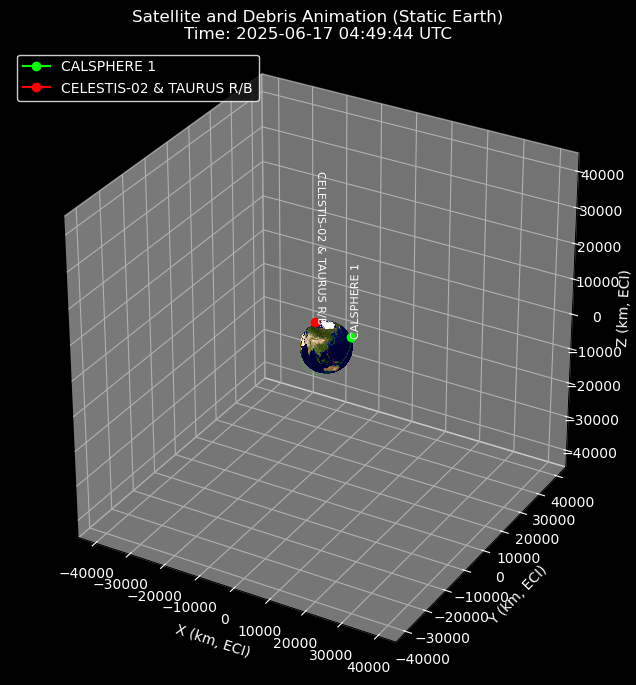


--- Phase 3: 3D Visualization (Matplotlib) - Execution Complete ---
Interactive globe plot displayed (if successful) and video/CSV saved (if all dependencies met).


In [85]:

# --- Cell 4: Function to Demonstrate Orbital Propagation (MODIFIED) ---
# This function now RETURNS the positions, velocities, and times
def demonstrate_propagation(satellite_object, start_time, end_time, time_step_minutes):
    """
    Demonstrates how to propagate the orbit of a single satellite object
    over a specified time range and returns its positions, velocities, and times.
    """
    if not satellite_object:
        print("No satellite object provided for propagation demonstration.")
        return None, None, None # Return None for all values

    print(f"\n--- Demonstrating Propagation for: {satellite_object.name} ---")
    print(f"Propagating from {start_time.utc_datetime()} to {end_time.utc_datetime()} (UTC) every {time_step_minutes} minutes.")

    total_minutes = (end_time - start_time) * (24 * 60)
    minutes_since_start = np.arange(0, total_minutes + time_step_minutes, time_step_minutes)
    times = start_time + minutes_since_start / (24 * 60)

    try:
        positions_km = satellite_object.at(times).position.km
        velocities_km_s = satellite_object.at(times).velocity.km_per_s

        print(f"Total propagated points: {len(times)}")
        print("Sample Positions (X, Y, Z in km) and Velocities (Vx, Vy, Vz in km/s) in ECI coordinates:")
        
        num_samples_to_print = min(5, len(times))
        
        for i in range(num_samples_to_print):
            print(f"Time (UTC): {times[i].utc_datetime().strftime('%Y-%m-%d %H:%M:%S')}")
            print(f"  Pos: [{positions_km[0, i]:.2f}, {positions_km[1, i]:.3f}, {positions_km[2, i]:.3f}] km")
            print(f"  Vel: [{velocities_km_s[0, i]:.3f}, {velocities_km_s[1, i]:.3f}, {velocities_km_s[2, i]:.3f}] km/s")
            print("-" * 20)
            
        if len(times) > num_samples_to_print * 2:
            print("...")
            for i in range(len(times) - num_samples_to_print, len(times)):
                print(f"Time (UTC): {times[i].utc_datetime().strftime('%Y-%m-%d %H:%M:%S')}")
                print(f"  Pos: [{positions_km[0, i]:.3f}, {positions_km[1, i]:.3f}, {positions_km[2, i]:.3f}] km")
                print(f"  Vel: [{velocities_km_s[0, i]:.3f}, {velocities_km_s[1, i]:.3f}, {velocities_km_s[2, i]:.3f}] km/s")
                print("-" * 20)
        
        return positions_km, velocities_km_s, times # Return the calculated data

    except Exception as e:
        print(f"Error during propagation for {satellite_object.name}: {e}")
        return None, None, None # Return None in case of error



# --- Create a combined list of all EarthSatellite objects ---
All_satellite_objects = Last_30_Days_Launches_File + Active_Satellites_File

# --- Select a sample active satellite and a sample debris satellite from the OBJECTS list ---
sample_active_sat = None
sample_debris_sat = None

''' 
USE THIS CODE WHEN YOU WANT TO GET RANDOM SATELLITE AND DEBRIS FROM FILTERTED DATA
# Iterate through the combined list of objects to find suitable samples
for sat_obj in all_satellite_objects:
    if sat_obj.name in df_tles_2_filtered['Name'].values and sample_active_sat is None:
        # Assuming df_tles_2 represents "active satellites" after your filtering
        sample_active_sat = sat_obj
    if sat_obj.name in df_tles_4['Name'].values and sample_debris_sat is None:
        # df_tles_4 represents "rocket bodies/debris"
        sample_debris_sat = sat_obj
    if sample_active_sat and sample_debris_sat:
        break # Found both samples, no need to continue loop
'''

# USE THIS CODE WHEN YOUR SATELLITE AND DEBRIS NAMES ARE FIXED
for sat_obj in All_satellite_objects:
    if sat_obj.name == 'CALSPHERE 1' and sample_active_sat is None:
        sample_active_sat = sat_obj
    if sat_obj.name == 'CELESTIS-02 & TAURUS R/B' and sample_debris_sat is None:
        sample_debris_sat = sat_obj
    if sample_active_sat and sample_debris_sat:
        break

# Dictionaries to store pre-calculated positions and times
pre_calculated_positions = {}
pre_calculated_times = None # Will be set once

print("\n--- Demonstration of Propagating a Sample Active Satellite ---")
if sample_active_sat:
    active_pos, active_vel, active_times = demonstrate_propagation(sample_active_sat, CURRENT_TIME, FUTURE_TIME, TIME_STEP_MINUTES)
    if active_pos is not None:
        pre_calculated_positions[sample_active_sat.name] = active_pos
        pre_calculated_times = active_times # Store these times, they are the same for all
else:
    print("No sample active satellite found to demonstrate propagation. Ensure 'active_satellites.txt' has valid TLEs.")

print("\n--- Demonstration of Propagating a Sample Rocket Body (Debris) ---")
if sample_debris_sat:
    debris_pos, debris_vel, debris_times = demonstrate_propagation(sample_debris_sat, CURRENT_TIME, FUTURE_TIME, TIME_STEP_MINUTES)
    if debris_pos is not None:
        pre_calculated_positions[sample_debris_sat.name] = debris_pos
        pre_calculated_times = debris_times # Ensure times are also stored if this was the first successful one
else:
    print("No sample debris satellite found to demonstrate propagation. Ensure 'last30days_launches.txt' or 'active_satellites.txt' contains TLEs matching debris keywords.")

print("\n--- Phase 1: Orbital Propagation - Execution Complete ---")
print("You now have the capability to predict the position and velocity of any satellite from its TLE at any given time.")
print("This is the essential capability required for collision prediction!")




# IMPORTANT: This function assumes 'ts' (timescale object),
# 'PROPAGATION_DURATION_HOURS', and 'TIME_STEP_MINUTES'
# are defined in your global scope from earlier parts of your script.
# If running this function in isolation, you would need to define them here.



# --- Now, the plot_orbits_matplotlib_animation function (MODIFIED) ---
def plot_orbits_matplotlib_animation(selected_sats, ts_obj, prop_duration_hours, time_step_minutes, pre_calculated_positions=None, pre_calculated_times=None):
    """
    Plots the propagated orbits of SPECIFIC selected EarthSatellite objects
    on a 3D globe using Matplotlib, with animation and video export.

    Args:
        selected_sats (list): List of EarthSatellite objects to visualize.
        ts_obj (skyfield.api.Timescale): The timescale object.
        prop_duration_hours (int): Duration of propagation in hours.
        time_step_minutes (int): Time step for propagation in minutes.
        pre_calculated_positions (dict, optional): Dictionary mapping satellite name to pre-calculated
                                                    positions (numpy array). If provided, these are used.
        pre_calculated_times (skyfield.api.Time, optional): Skyfield Time array corresponding to the
                                                             pre-calculated positions. Required if
                                                             pre_calculated_positions is provided.
    """
    if not selected_sats:
        print("No satellites provided to visualize. Please ensure 'selected_sats' is not empty.")
        return

    print("\n--- Generating Matplotlib 3D Globe Visualization with Animation ---")
    print("NOTE: Earth will be static (non-rotating) in this visualization.")

    # --- Time setup ---
    # Determine which times to use: pre-calculated or generate new ones
    if pre_calculated_times is not None and pre_calculated_positions is not None:
        times_skyfield_array = pre_calculated_times
        print("Using pre-calculated times for animation frames.")
    else:
        start_time = ts_obj.now()
        total_minutes = prop_duration_hours * 60
        times_dt = [start_time.utc_datetime() + timedelta(minutes=float(m)) for m in np.arange(0, total_minutes + time_step_minutes, time_step_minutes)]
        times_skyfield_array = ts_obj.utc(times_dt)
        print(f"Propagating for {prop_duration_hours} hours, creating {len(times_skyfield_array)} animation frames (every {time_step_minutes} minutes).")

    # --- Configuration for output files (video and CSV) ---
    output_base_dir = os.path.join(os.path.expanduser('~'), 'Desktop', 'R projects', '2025-04-01', 'Final Output - 2025-06-17', 'Phase 3 - Output')
    VIDEO_OUTPUT_PATH = os.path.join(output_base_dir, "selected_orbits_animation.mp4")
    CSV_OUTPUT_PATH = os.path.join(output_base_dir, "selected_orbits_distances_log.csv")

    if not os.path.exists(output_base_dir):
        os.makedirs(output_base_dir)
        print(f"Created output directory: {output_base_dir}")
    else:
        print(f"Output directory found: {output_base_dir}")

    # --- Load Earth texture ---
    earth_texture_url = "https://eoimages.gsfc.nasa.gov/images/imagerecords/57000/57730/land_ocean_ice_2048.png"
    print(f"Downloading Earth texture from: {earth_texture_url}")
    try:
        with urllib.request.urlopen(earth_texture_url) as url_response:
            img = Image.open(url_response).resize((360, 180))
        earth_texture = np.array(img) / 255.0
        print("Earth texture downloaded successfully.")
    except Exception as e:
        print(f"ERROR: Could not download Earth texture: {e}")
        print("Proceeding without Earth texture (Earth will be plain blue).")
        earth_texture = np.array([[[0, 0, 1]]]) # Simple blue color fallback

    # --- Create Earth sphere coordinates ---
    earth_radius = 6371
    phi = np.linspace(0, 2 * np.pi, 360)
    theta = np.linspace(0, np.pi, 180)
    phi, theta = np.meshgrid(phi, theta)
    x_earth = earth_radius * np.sin(theta) * np.cos(phi)
    y_earth = earth_radius * np.sin(theta) * np.sin(phi)
    z_earth = earth_radius * np.cos(theta)

    if earth_texture.shape[0] > 1:
        lon_idx = np.clip((phi / (2 * np.pi) * earth_texture.shape[1]).astype(int), 0, earth_texture.shape[1] - 1)
        lat_idx = np.clip(((theta) / np.pi * earth_texture.shape[0]).astype(int), 0, earth_texture.shape[0] - 1)
        facecolors = earth_texture[lat_idx, lon_idx]
    else:
        facecolors = np.full(x_earth.shape + (3,), earth_texture[0,0])

    # --- Setup plot ---
    fig = plt.figure(figsize=(10, 8), facecolor='black')
    ax = fig.add_subplot(111, projection='3d')
    limit = 45000 # Define display limits for the plot (adjust as needed for your orbits)
    ax.set_xlim([-limit, limit])
    ax.set_ylim([-limit, limit])
    ax.set_zlim([-limit, limit])
    ax.set_box_aspect([1, 1, 1])
    ax.set_title("Satellite and Debris Animation (Static Earth)", color='white')
    ax.set_xlabel("X (km, ECI)", color='white')
    ax.set_ylabel("Y (km, ECI)", color='white')
    ax.set_zlabel("Z (km, ECI)", color='white')
    ax.set_facecolor('black')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.tick_params(axis='z', colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')
    ax.title.set_color('white')

    ax.plot_surface(x_earth, y_earth, z_earth, rstride=1, cstride=1, facecolors=facecolors,
                    linewidth=0, antialiased=False, shade=False, zorder=0)

    # --- Satellite locations and paths ---
    scatters_data = []
    labels_artists = []

    print("Retrieving or pre-calculating selected satellite positions for animation frames...")
    final_positions_for_plot = {} # Use a different name to avoid confusion with the passed dict

    for sat in selected_sats:
        pos_data = None
        if pre_calculated_positions and sat.name in pre_calculated_positions:
            pos_data = pre_calculated_positions[sat.name]
            print(f"  Using pre-calculated positions for {sat.name}.")
        else:
            # Fallback: if not pre-calculated, calculate them here
            print(f"  Pre-calculated positions not found for {sat.name}. Calculating now...")
            pos_data = sat.at(times_skyfield_array).position.km

        if pos_data is not None:
            final_positions_for_plot[sat.name] = pos_data

            initial_pos = np.array([pos_data[0, 0], pos_data[1, 0], pos_data[2, 0]])

            marker_color = 'white'
            if len(selected_sats) == 2:
                if sat.name == selected_sats[0].name:
                    marker_color = 'lime'
                elif sat.name == selected_sats[1].name:
                    marker_color = 'red'

            marker_line, = ax.plot([initial_pos[0]], [initial_pos[1]], [initial_pos[2]],
                                    marker='o', markersize=6, color=marker_color,
                                    label=sat.name, zorder=5)

            path_line, = ax.plot(pos_data[0, :], pos_data[1, :], pos_data[2, :],
                                 linestyle='--', color=marker_color, alpha=0.5, linewidth=0.5, zorder=4)

            label_artist = ax.text(initial_pos[0], initial_pos[1], initial_pos[2], sat.name,
                                    fontsize=8, color='white', zorder=6)

            scatters_data.append({
                'marker': marker_line,
                'path': path_line,
                'name': sat.name,
                'initial_color': marker_color
            })
            labels_artists.append(label_artist)
        else:
            print(f"Skipping plotting for {sat.name} due to missing position data.")


    ax.legend(loc='upper left', frameon=True, facecolor='black', edgecolor='white', labelcolor='white')

    log_data = []

    def update(frame):
        current_frame_positions = []

        for i, sat_info in enumerate(scatters_data):
            sat_name = sat_info['name']
            # Use the positions stored in final_positions_for_plot
            pos_data = final_positions_for_plot[sat_name]

            sat_info['marker'].set_data_3d([pos_data[0, frame]], [pos_data[1, frame]], [pos_data[2, frame]])
            labels_artists[i].set_position((pos_data[0, frame], pos_data[1, frame]))
            labels_artists[i].set_3d_properties(pos_data[2, frame], zdir='z')
            sat_info['path'].set_data_3d(pos_data[0, :frame+1], pos_data[1, :frame+1], pos_data[2, :frame+1])

            current_frame_positions.append(np.array([pos_data[0, frame], pos_data[1, frame], pos_data[2, frame]]))

        min_dist = float('nan')
        closest_pair_indices = None

        if len(current_frame_positions) == 2:
            dist = np.linalg.norm(current_frame_positions[0] - current_frame_positions[1])
            min_dist = dist
            closest_pair_indices = (0, 1)

        collision_threshold_km = 50

        for scatter_data in scatters_data:
            scatter_data['marker'].set_color(scatter_data['initial_color'])
            scatter_data['path'].set_color(scatter_data['initial_color'])

        if closest_pair_indices and min_dist < collision_threshold_km:
            scatters_data[closest_pair_indices[0]]['marker'].set_color('yellow')
            scatters_data[closest_pair_indices[1]]['marker'].set_color('yellow')
            scatters_data[closest_pair_indices[0]]['path'].set_color('yellow')
            scatters_data[closest_pair_indices[1]]['path'].set_color('yellow')

        log_entry = {
            "frame": frame,
            "time_utc": times_skyfield_array[frame].utc_datetime().strftime("%Y-%m-%d %H:%M:%S UTC"),
            "satellite_1": selected_sats[0].name if len(selected_sats) > 0 else "N/A",
            "satellite_2": selected_sats[1].name if len(selected_sats) > 1 else "N/A",
            "distance_km": min_dist
        }
        log_data.append(log_entry)

        ax.set_title(f"Satellite and Debris Animation (Static Earth)\nTime: {times_skyfield_array[frame].utc_datetime():%Y-%m-%d %H:%M:%S} UTC", color='white')

        return [s['marker'] for s in scatters_data] + [s['path'] for s in scatters_data] + labels_artists


    print("Creating animation (this may take a moment)...")
    ani = FuncAnimation(fig, update, frames=len(times_skyfield_array), interval=50, blit=False)

    output_video_path = VIDEO_OUTPUT_PATH
    print(f"Attempting to save animation to {output_video_path}...")
    print("This requires 'ffmpeg' to be installed on your system.")

    try:
        writer = FFMpegWriter(fps=10)
        ani.save(output_video_path, writer=writer)
        print(f"Animation saved successfully as '{output_video_path}'.")
    except FileNotFoundError:
        print("\nERROR: FFMPEG not found!")
        print("Please ensure FFmpeg is installed on your system and accessible from your PATH.")
        print("For macOS, you can install it via Homebrew: `brew install ffmpeg`")
        print("For Windows, download from https://ffmpeg.org/download.html and add to PATH.")
    except Exception as e:
        print(f"\nERROR: Could not save animation to video: {e}")
        print(f"Details: {e}")
        print("Common reasons: missing FFmpeg, insufficient disk space, or incorrect permissions.")

    output_csv_path = CSV_OUTPUT_PATH
    df_log = pd.DataFrame(log_data)
    df_log.to_csv(output_csv_path, index=False)
    print(f"CSV log saved as '{output_csv_path}'.")

    print("\nMatplotlib visualization script finished.")
    plt.show()


# Cell 7: Execute the Matplotlib 3D Globe Plotting (MODIFIED CALL)

# Combine the selected active and debris satellites into a single list for the plotter
sats_to_visualize_together = []
if sample_active_sat: # Use the sample_active_sat selected in the previous cell
    sats_to_visualize_together.append(sample_active_sat)
if sample_debris_sat: # Use the sample_debris_sat selected in the previous cell
    sats_to_visualize_together.append(sample_debris_sat)


if sats_to_visualize_together:
    print("\n--- Calling visualization function for selected satellites ---")
    plot_orbits_matplotlib_animation(
        sats_to_visualize_together,
        INITIAL_TIME_SCALE,
        TIME_DURATION_IN_HRS,
        TIME_STEP_MINUTES,
        pre_calculated_positions=pre_calculated_positions, # Pass the pre-calculated positions
        pre_calculated_times=pre_calculated_times # Pass the pre-calculated times
    )
else:
    print("No satellites were selected for plotting in Cell 3/5.")
    print("Cannot generate visualization without satellite data.")

print("\n--- Phase 3: 3D Visualization (Matplotlib) - Execution Complete ---")
print("Interactive globe plot displayed (if successful) and video/CSV saved (if all dependencies met).")

#### Phase 3: Quantitative Conjunction Analysis and Collision Prediction.


The third and most critical phase of the project transitions from qualitative visualization to rigorous quantitative analysis. Its primary objective is to accurately predict potential collision events by identifying instances where the spatial separation between selected operational satellites and space debris objects falls below predefined safety thresholds, providing crucial data for proactive risk management.

1. Defining the Conjunction Analysis Time Window:

For effective collision prediction, it is imperative to establish a clear temporal scope for the analysis. Unlike the visualization phase, which prioritizes short-term smoothness, conjunction analysis typically looks further into the future to provide sufficient warning time for potential mitigation actions.

•	conjunction_start_time = INITIAL_TIME_SCALE.now(): The analysis commences from the exact current UTC time, ensuring the predictions are relevant to the present moment.

•	conjunction_duration_days = 3: A specified duration (e.g., 3 days) defines the forward-looking period for which close approaches will be sought. This can be adjusted based on operational requirements, balancing the need for early warning with the inherent increase in orbital prediction uncertainty over longer periods.

•	conjunction_end_time = INITIAL_TIME_SCALE.utc(...): This calculates the precise end-point of the analysis window by adding the conjunction_duration_days to the conjunction_start_time using the robust timedelta object.

•	conjunction_time_step_minutes = 5: To balance computational efficiency with detection granularity, the analysis samples object positions at discrete intervals (e.g., every 5 minutes). This step size determines how finely potential conjunctions are identified.


2. Quantifying Analysis Time Steps:

   To prepare for systematic orbital propagation, the total number of discrete time points within the defined conjunction analysis window is calculated.
   
•	total_seconds_conj: This variable determines the overall duration of the analysis window in seconds.

•	num_conjunction_steps: By dividing total_seconds_conj by the conjunction_time_step_minutes (converted to seconds), the total number of individual time points at which satellite positions will be computed is derived. This count defines the resolution of the conjunction scan.


3. Ensuring Robust Time Array Generation:

   A critical safeguard is implemented to ensure the reliability of the time array generation.
   
•	if num_conjunction_steps < 2: num_conjunction_steps = 2: This check ensures that the linspace function (used to generate evenly spaced time points) always has at least two points (a start and an end). This is crucial because linspace requires at least two points to define a meaningful interval for division; otherwise, it could lead to errors or an ambiguous output, similar to trying to define a journey with only a single stop at the origin.


4. Generating the Conjunction Time Array:
   
•	conjunction_times = INITIAL_TIME_SCALE.linspace(conjunction_start_time, conjunction_end_time, num_conjunction_steps): This command generates a NumPy array of Skyfield time objects. Each element in this array represents a specific moment in time at which the positions of the satellites will be calculated and checked for close proximity.


5. Defining the Conjunction Threshold:

   A numerical threshold is established to quantitatively define what constitutes a "conjunction event" – a close approach that warrants attention.
   
•	conjunction_threshold_km = 500.0: This value (e.g., 500 kilometers) acts as the critical distance. Any instance where the separation between two objects falls below this threshold is flagged as a potential conjunction, indicating a need for further investigation or possible mitigation. This threshold is typically larger than a direct collision radius, serving as an early warning buffer.


6. Initiating Conjunction Analysis for the Selected Pair:

The analysis proceeds by focusing specifically on the two satellite objects (selected_active_for_analysis and selected_debris_for_analysis) that were chosen for detailed visualization in the previous phase. This ensures a targeted and relevant analysis.


7. Orbital Propagation and Relative Distance Calculation:

   Within a robust try-except block (to handle potential errors during propagation), the core orbital mechanics calculations are performed:

•	active_pos_at_t_conj = selected_active_for_analysis.at(conjunction_times): The precise 3D geocentric positions (x, y, z coordinates) of the active satellite are computed at every time point defined in conjunction_times.

•	debris_pos_at_t_conj = selected_debris_for_analysis.at(conjunction_times): Similarly, the 3D positions for the debris object are calculated for the same time array.

•	relative_position_conj = active_pos_at_t_conj - debris_pos_at_t_conj: This vector subtraction yields a new array of 3D vectors, each representing the instantaneous relative position of the active satellite with respect to the debris object.

•	distances_km_conj = relative_position_conj.distance().km: The magnitude (length) of each relative position vector is then calculated, providing a NumPy array of scalar distances (in kilometers) between the two objects at every time step within the analysis window.


8. Identifying and Logging All Conjunction Events & the Absolute Closest Approach:

   This crucial step systematically processes the calculated distances to identify all moments of concern and pinpoint the single closest approach.
   
•	Comprehensive Event Logging: A for loop iterates through every dist_val in the distances_km_conj array. If a dist_val is found to be less than the conjunction_threshold_km, a detailed record (including satellite names, the exact distance, and the corresponding UTC time) is appended to the conjunction_events list. This ensures that every instance where the objects breach the defined proximity threshold is captured, providing a complete history of "close passes."

•	Identifying the Absolute Minimum: Separately, np.argmin(distances_km_conj) is used to find the index of the absolute minimum distance within the entire distances_km_conj array. This allows the system to pinpoint the single moment of the closest encounter and retrieve its precise distance and time, providing a "worst-case scenario" summary for the entire analysis window.



In [29]:
# --- Phase 3: Conjunction Analysis (Core Logic) ---
print("\n--- Starting Phase 3: Conjunction Analysis ---")
print("NOTE: Conjunction analysis will now *only* be performed for the selected active and debris objects used in the 3D plot.")

# 1. Define the Time Window for Conjunction Analysis
conjunction_start_time = INITIAL_TIME_SCALE.now()
conjunction_duration_days = 3 # Analyze for the next 3 days
# Use timedelta for robust time addition
end_dt = conjunction_start_time.utc_datetime() + timedelta(days=conjunction_duration_days)
conjunction_end_time = INITIAL_TIME_SCALE.utc(end_dt.year, end_dt.month, end_dt.day,
                               end_dt.hour, end_dt.minute, end_dt.second)

conjunction_time_step_minutes = 5 # Analyze every 5 minutes

# Calculate the number of steps based on the total duration and time step
total_seconds_conj = (conjunction_end_time.utc_datetime() - conjunction_start_time.utc_datetime()).total_seconds()
num_conjunction_steps = int(total_seconds_conj / (conjunction_time_step_minutes * 60))

# Ensure at least two steps for linspace, even if the duration is very short, to avoid errors
if num_conjunction_steps < 2:
    num_conjunction_steps = 2 # Minimum for linspace

# Generate Skyfield Time array for conjunction analysis
conjunction_times = INITIAL_TIME_SCALE.linspace(conjunction_start_time, conjunction_end_time, num_conjunction_steps)

print(f"Conjunction analysis window: {conjunction_start_time.utc_datetime()} to {conjunction_end_time.utc_datetime()} (UTC)")
print(f"Number of conjunction time steps: {len(conjunction_times)}")

# 2. Define Conjunction Threshold
conjunction_threshold_km = 500.0 # Kilometers
print(f"Conjunction threshold set to: {conjunction_threshold_km} km")

# 3. Storage for identified conjunctions
conjunction_events = [] # This list will store ALL points below threshold

# Variables to hold the single closest approach summary
min_distance_conj_summary = float('inf')
time_of_closest_approach_conj_summary = None

# --- IMPORTANT: Perform conjunction analysis ONLY on the selected pair for plotting ---
if len(sats_to_visualize_together) == 2:
    selected_active_for_analysis = sats_to_visualize_together[0]
    selected_debris_for_analysis = sats_to_visualize_together[1]

    print(f"\nPerforming conjunction analysis for the specific pair: '{selected_active_for_analysis.name}' and '{selected_debris_for_analysis.name}'")

    try:
        # Propagate orbits for both selected objects over the conjunction analysis time window
        active_pos_at_t_conj = selected_active_for_analysis.at(conjunction_times)
        debris_pos_at_t_conj = selected_debris_for_analysis.at(conjunction_times)

        # Calculate the relative position vector and distance
        relative_position_conj = active_pos_at_t_conj - debris_pos_at_t_conj
        distances_km_conj = relative_position_conj.distance().km

        # --- REVISED LOGIC: Iterate through all distances to log ALL threshold breaches ---
        # This will populate conjunction_events with consistently structured dictionaries.
        for j, dist_val in enumerate(distances_km_conj):
            if dist_val < conjunction_threshold_km:
                conjunction_events.append({
                    'active_satellite': selected_active_for_analysis.name,
                    'debris_object': selected_debris_for_analysis.name,
                    'distance_km': dist_val, # Use 'distance_km' for all logged distances
                    'time_utc': conjunction_times[j].utc_datetime().strftime("%Y-%m-%d %H:%M:%S UTC"),
                    'threshold_km': conjunction_threshold_km
                })

        # --- RETAINED: Find the single overall minimum distance and its time ---
        # This is for summary reporting, not for populating the conjunction_events list directly
        min_distance_idx_conj = np.argmin(distances_km_conj)
        min_distance_conj_summary = distances_km_conj[min_distance_idx_conj]
        time_of_closest_approach_conj_summary = conjunction_times[min_distance_idx_conj]


    except Exception as e:
        print(f"Error during conjunction analysis for {selected_active_for_analysis.name} and {selected_debris_for_analysis.name}: {e}")
        print("This often happens if TLEs are malformed or a satellite cannot be propagated.")
else:
    print("Conjunction analysis for specific pair skipped: Not exactly two satellites selected for analysis.")

print("\nConjunction analysis complete.")

# 5. Report Conjunction Analysis Findings
print("\n--- Conjunction Analysis Results for Selected Satellites ---")

# Always report the single absolute closest approach (summary)
if time_of_closest_approach_conj_summary is not None and min_distance_conj_summary < float('inf'):
    print(f"\n**Absolute Closest Approach in Window:**")
    print(f"  Pair: {selected_active_for_analysis.name} & {selected_debris_for_analysis.name}")
    print(f"  Minimum Distance: {min_distance_conj_summary:.2f} km")
    print(f"  Time of Closest Approach: {time_of_closest_approach_conj_summary.utc_datetime().strftime('%Y-%m-%d %H:%M:%S UTC')}")
    if min_distance_conj_summary < conjunction_threshold_km:
        print(f"  (This closest approach is BELOW the {conjunction_threshold_km} km threshold!)")
    else:
        print(f"  (This closest approach is ABOVE the {conjunction_threshold_km} km threshold.)")
else:
    print("\nCould not determine absolute closest approach (e.g., propagation error or no data).")


# Report all events below the threshold (from the 'for' loop)
if conjunction_events:
    df_conjunctions = pd.DataFrame(conjunction_events)
    # Sort by distance_km for easier review
    df_conjunctions_sorted = df_conjunctions.sort_values(by='distance_km').reset_index(drop=True)
    print(f"\nFound {len(df_conjunctions_sorted)} records below the {conjunction_threshold_km} km threshold:")
    # Use .to_string() to print the entire DataFrame without truncation
    print(df_conjunctions_sorted.to_string())

    # Optional: Save conjunctions to CSV
    # Define your desired output directory (adjust this path as needed)
    conjunction_output_dir = os.path.join(os.path.expanduser('~'), 'Desktop', 'R projects', '2025-04-01', 'Final Output - 2025-06-16', 'Phase 4 - Output')
    if not os.path.exists(conjunction_output_dir):
        os.makedirs(conjunction_output_dir) # Create directory if it doesn't exist

    conjunction_csv_path = os.path.join(conjunction_output_dir, "selected_pair_conjunction_events.csv")
    df_conjunctions_sorted.to_csv(conjunction_csv_path, index=False)
    print(f"\nConjunction events for selected pair saved to: '{conjunction_csv_path}'")

else:
    print("\nNo conjunction events found below the defined threshold for the selected time window and objects.")

print("\n--- End of Phase 3: Conjunction Analysis for Selected Satellites ---")



--- Starting Phase 3: Conjunction Analysis ---
NOTE: Conjunction analysis will now *only* be performed for the selected active and debris objects used in the 3D plot.
Conjunction analysis window: 2025-06-16 01:23:06.274750+00:00 to 2025-06-19 01:23:06+00:00 (UTC)
Number of conjunction time steps: 863
Conjunction threshold set to: 500.0 km

Performing conjunction analysis for the specific pair: 'CALSPHERE 1' and 'CELESTIS-02 & TAURUS R/B'

Conjunction analysis complete.

--- Conjunction Analysis Results for Selected Satellites ---

**Absolute Closest Approach in Window:**
  Pair: CALSPHERE 1 & CELESTIS-02 & TAURUS R/B
  Minimum Distance: 423.05 km
  Time of Closest Approach: 2025-06-18 09:15:51 UTC
  (This closest approach is BELOW the 500.0 km threshold!)

Found 1 records below the 500.0 km threshold:
  active_satellite             debris_object  distance_km                 time_utc  threshold_km
0      CALSPHERE 1  CELESTIS-02 & TAURUS R/B      423.049  2025-06-18 09:15:51 UTC       